In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
%matplotlib inline

In [3]:
path_to_file = 'C:\Users\Administrator\Documents\Python Scripts\examplepark.csv'
data = pd.read_csv(path_to_file)

In [4]:
#data.head(10)

In [5]:
#data.info()

In [6]:
#data.describe()

In [7]:
#type(data['Time'][0])

In [8]:
#type(data['Date'][0])

In [9]:
#type(data['Age_Grade'][0])

In [10]:
data['Time'] = ((pd.to_numeric(data['Time'].str.slice(0,2)))*60)+(pd.to_numeric(data['Time'].str.slice(3,5)))+((pd.to_numeric(data['Time'].str.slice(6,8)))/60)

In [11]:
data['Date'] = pd.to_datetime(data['Date'],errors='coerce', format='%d-%m-%Y')

In [12]:
data['Age_Cat'] = pd.to_numeric(data['Age_Cat'].str.slice(2,4),errors='coerce', downcast='signed')

In [13]:
data['Age_Grade'] = pd.to_numeric(data['Age_Grade'].str.slice(0,5),errors='coerce')

In [14]:
#type(data['Age_Grade'][0])

In [15]:
#type(data['Time'][0])

In [16]:
#type(data['Date'][0])

In [17]:
data.head(10)

,Date,Pos,Name,Time,Age_Cat,Age_Grade,Gender,Gen_Pos,Club,Note,Total_Runs,Run_No.
0,2012-11-10,1,Michael MCSWIGGAN,18.316667,35.0,73.43,M,1.0,Portmarnock Athletic Club,First Timer!,29.0,1
1,2012-11-10,2,Alan FOLEY,18.433333,30.0,71.16,M,2.0,Raheny Shamrock AC,First Timer!,99.0,1
2,2012-11-10,3,Matt SHIELDS,18.533333,55.0,85.07,M,3.0,North Belfast Harriers,First Timer!,274.0,1
3,2012-11-10,4,David GARGAN,18.650000,40.0,73.73,M,4.0,Raheny Shamrock AC,First Timer!,107.0,1
4,2012-11-10,5,Paul SINTON-HEWITT,18.900000,50.0,79.28,M,5.0,Ranelagh Harriers,First Timer!,369.0,1
5,2012-11-10,6,John Gerard MURPHY,20.250000,40.0,68.97,M,6.0,North Belfast Harriers,First Timer!,342.0,1
6,2012-11-10,7,Conor FITZPATRICK,20.283333,20.0,64.26,M,7.0,Portmarnock Athletic Club,First Timer!,40.0,1
7,2012-11-10,8,Rachael BECK,20.450000,40.0,76.37,F,1.0,Fingal Triathlon Club,First Timer!,9.0,1
8,2012-11-10,9,Des HUSIN,20.533333,45.0,69.07,M,8.0,NaN,First Timer!,296.0,1
9,2012-11-10,10,John COLEMAN,20.816667,30.0,63.01,M,9.0,NaN,First Timer!,87.0,1


In [156]:
data['Club_Coded'] = data['Club'].isnull()

In [160]:
def converter(Club):
    if Club==True:
        return 0
    else:
        return 1

In [161]:
data['Club_Coded'] = data['Club_Coded'].apply(converter)

In [162]:
data.head(10)

,Date,Pos,Name,Time,Age_Cat,Age_Grade,Gender,Gen_Pos,Club,Note,Total_Runs,Run_No.,Club_Coded
0,2012-11-10,1,Michael MCSWIGGAN,18.316667,35.0,73.43,M,1.0,Portmarnock Athletic Club,First Timer!,29.0,1,1
1,2012-11-10,2,Alan FOLEY,18.433333,30.0,71.16,M,2.0,Raheny Shamrock AC,First Timer!,99.0,1,1
2,2012-11-10,3,Matt SHIELDS,18.533333,55.0,85.07,M,3.0,North Belfast Harriers,First Timer!,274.0,1,1
3,2012-11-10,4,David GARGAN,18.650000,40.0,73.73,M,4.0,Raheny Shamrock AC,First Timer!,107.0,1,1
4,2012-11-10,5,Paul SINTON-HEWITT,18.900000,50.0,79.28,M,5.0,Ranelagh Harriers,First Timer!,369.0,1,1
5,2012-11-10,6,John Gerard MURPHY,20.250000,40.0,68.97,M,6.0,North Belfast Harriers,First Timer!,342.0,1,1
6,2012-11-10,7,Conor FITZPATRICK,20.283333,20.0,64.26,M,7.0,Portmarnock Athletic Club,First Timer!,40.0,1,1
7,2012-11-10,8,Rachael BECK,20.450000,40.0,76.37,F,1.0,Fingal Triathlon Club,First Timer!,9.0,1,1
8,2012-11-10,9,Des HUSIN,20.533333,45.0,69.07,M,8.0,NaN,First Timer!,296.0,1,0
9,2012-11-10,10,John COLEMAN,20.816667,30.0,63.01,M,9.0,NaN,First Timer!,87.0,1,0


In [18]:
sns.set()

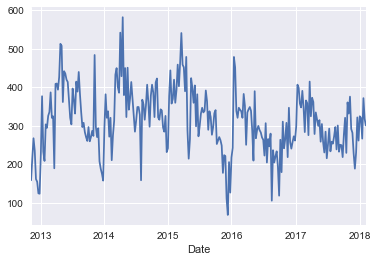

In [19]:
data.groupby('Date').count()['Pos'].plot.line() # The Position col is used because even Unknown athletes get a position, but not a time.
#So counting times results in a smaller athlete count. That's also why we don't drop the unknown athletes

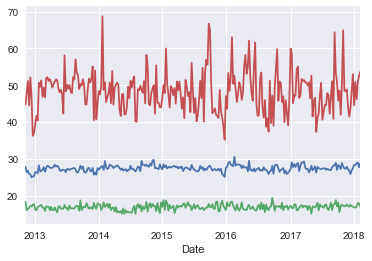

In [20]:
data.groupby('Date').mean()['Time'].plot.line()
data.groupby('Date').min()['Time'].plot.line()
data.groupby('Date').max()['Time'].plot.line()

In [21]:
#data.groupby('Date').mean()['Time'].plot.line()

In [22]:
#data.groupby('Date').min()['Time'].plot.line()

In [23]:
#data.groupby('Date').max()['Time'].plot.line()

In [165]:
data['Time'].min()

15.033333333333333

In [166]:
data['Time'].max()

68.75

In [167]:
data['Time'].mean()

27.529356874298536

In [169]:
#data.groupby('Age_Cat').max()['Time'].plot.line()

In [28]:
#data.groupby('Age_Cat').min()['Time'].plot.line()

In [29]:
#data.groupby('Age_Cat').mean()['Time'].plot.line()

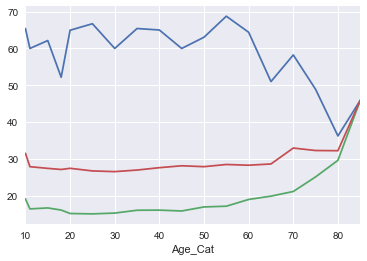

In [30]:
data.groupby('Age_Cat').max()['Time'].plot.line()
data.groupby('Age_Cat').min()['Time'].plot.line()
data.groupby('Age_Cat').mean()['Time'].plot.line()

In [31]:
# Do a plot of males and females, min,max and mean time vs age. 
#Then do a count of each category as a histogram.
# maybe could use < n to select between gender
# or use two groupbys
# or pivot table

In [32]:
#data.groupby('Date').describe().head()

In [33]:
#list(data.groupby('Age_Cat'))[0]

In [34]:
#data.groupby('Age_Cat').describe().head(20)

In [35]:
#data.groupby('Age_Cat').head()

In [36]:
#data.head()

In [170]:
#data.groupby(['Gender','Age_Cat']).mean()['Time'].plot.line()

In [171]:
#data.groupby(['Gender','Age_Cat']).mean().plot.line()

In [39]:
data.groupby(['Gender','Age_Cat']).describe().head()

Age_Grade                                               \
                   count       mean       std    min      25%     50%   
Gender Age_Cat                                                          
F      10.0        463.0  55.814665  9.654700  27.80  48.9350  55.450   
       11.0       1063.0  53.785240  9.960095  27.15  46.1050  53.050   
       15.0        893.0  50.800459  9.812228  24.62  43.9000  50.330   
       18.0        346.0  53.641676  7.976884  28.48  48.5275  54.115   
       20.0        996.0  50.867781  9.246517  22.79  45.1100  51.465   

                               Gen_Pos             ...         Time  \
                    75%    max   count       mean  ...          75%   
Gender Age_Cat                                     ...                
F      10.0     62.0800  78.95   468.0  89.675214  ...    36.566667   
       11.0     61.3700  84.74  1069.0  76.621141  ...    35.016667   
       15.0     58.4700  80.53   900.0  79.568889  ...    34.862500   
       18.0     59.8225  79.68   352.0  56.090909  ...    30.716667   
       20.0     56.6700  82.91  1006.0  71.701789  ...    32.762500   

                          Total_Runs                                        \
                      max      count       mean        std  min  25%   50%   
Gender Age_Cat                                                               
F      10.0     65.166667      468.0  13.273504  19.209818  1.0  2.0   6.0   
       11.0     59.983333     1069.0  21.328344  22.473908  1.0  4.0  14.0   
       15.0     62.133333      900.0  21.668889  29.245867  1.0  3.0  11.0   
       18.0     52.150000      352.0  54.056818  48.875936  1.0  7.0  31.0   
       20.0     64.933333     1006.0  30.264414  37.544212  1.0  3.0  12.0   

                             
                 75%    max  
Gender Age_Cat               
F      10.0     14.0  122.0  
       11.0     33.0  199.0  
       15.0     31.0  180.0  
       18.0     80.0  135.0  
       20.0     42.0  135.0  

[5 rows x 48 columns]

In [40]:
df1 = data.groupby(['Gender','Age_Cat']).mean()['Time']

In [41]:
df1.head()

Gender  Age_Cat
F       10.0       32.879202
        11.0       31.058809
        15.0       31.332648
        18.0       28.495502
        20.0       30.145129
Name: Time, dtype: float64

In [42]:
df1.unstack()

Age_Cat,10.0,11.0,15.0,18.0,20.0,25.0,30.0,35.0,40.0,45.0,50.0,55.0,60.0,65.0,70.0,75.0,80.0,85.0
Gender,,,,,,,,,,,,,,,,,,
F,32.879202,31.058809,31.332648,28.495502,30.145129,29.715819,29.722769,29.445638,30.441809,30.676282,31.072121,32.690354,32.255015,31.679966,47.916667,43.033333,NaN,45.883333
M,30.426167,25.713185,23.841884,24.954148,23.083596,23.203273,23.440808,23.989655,24.031783,25.303550,25.572733,25.796064,26.072968,27.488043,32.162121,31.476488,32.199167,NaN


In [43]:
df1.unstack(level=0)

Gender,F,M
Age_Cat,,
10.0,32.879202,30.426167
11.0,31.058809,25.713185
15.0,31.332648,23.841884
18.0,28.495502,24.954148
20.0,30.145129,23.083596
25.0,29.715819,23.203273
30.0,29.722769,23.440808
35.0,29.445638,23.989655
40.0,30.441809,24.031783


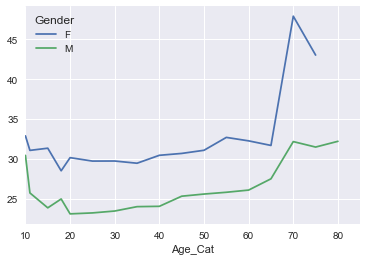

In [44]:
df1.unstack(level=0).plot.line() ## It would be nice to put the std deviation
# around these pts.

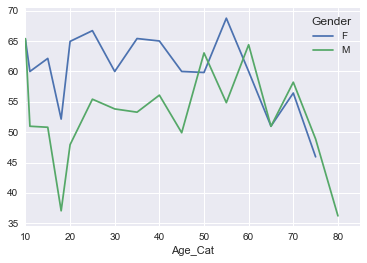

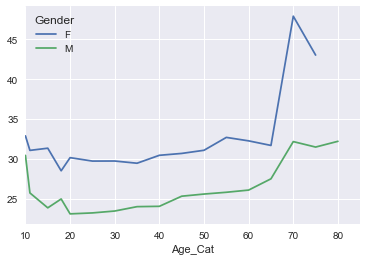

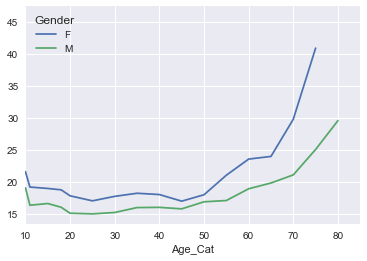

In [45]:
data.groupby(['Gender','Age_Cat']).max()['Time'].unstack(level=0).plot.line()
data.groupby(['Gender','Age_Cat']).mean()['Time'].unstack(level=0).plot.line()
data.groupby(['Gender','Age_Cat']).min()['Time'].unstack(level=0).plot.line()

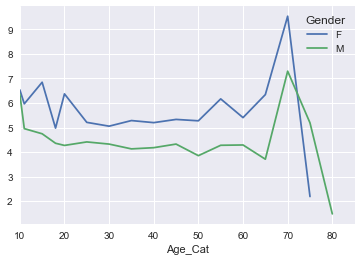

In [46]:
data.groupby(['Gender','Age_Cat']).std()['Time'].unstack(level=0).plot.line()

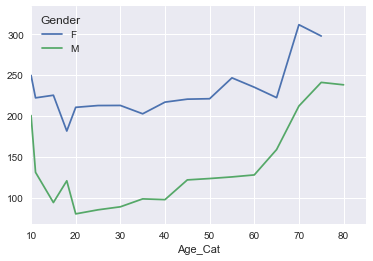

In [47]:
data.groupby(['Gender','Age_Cat']).mean()['Pos'].unstack(level=0).plot.line()

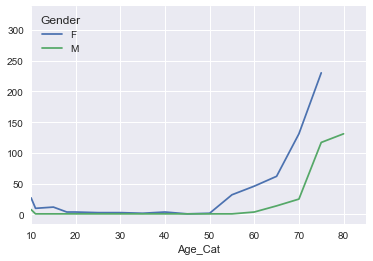

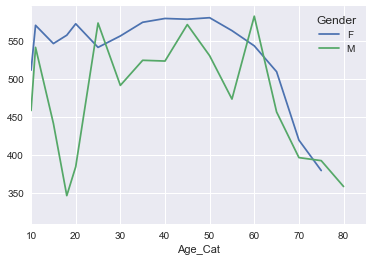

In [48]:
data.groupby(['Gender','Age_Cat']).min()['Pos'].unstack(level=0).plot.line()
data.groupby(['Gender','Age_Cat']).max()['Pos'].unstack(level=0).plot.line()

In [49]:
df1 = data.groupby(['Gender','Age_Cat']).mean()['Time'].unstack(level=0)

In [50]:
#df_fem = df.iloc[:17]

In [51]:
#df_fem.head(20)

In [52]:
#df_male = df.iloc[17:]

In [53]:
#df_male.head(20)

# Can we predict the Gender of a Runner?

## First we use pairplot from Seaborn

### It seems it should be possible to separate both genders. It seems like Age, Finish Position, Total Runs and Time are important. 
### Both Gen_Pos (Gender Position) and Age_Grade (https://support.parkrun.com/hc/en-us/articles/200565263-What-is-age-grading-) have gender built into them. This is useful but makes the problem trivial. So we'll leave them both out.

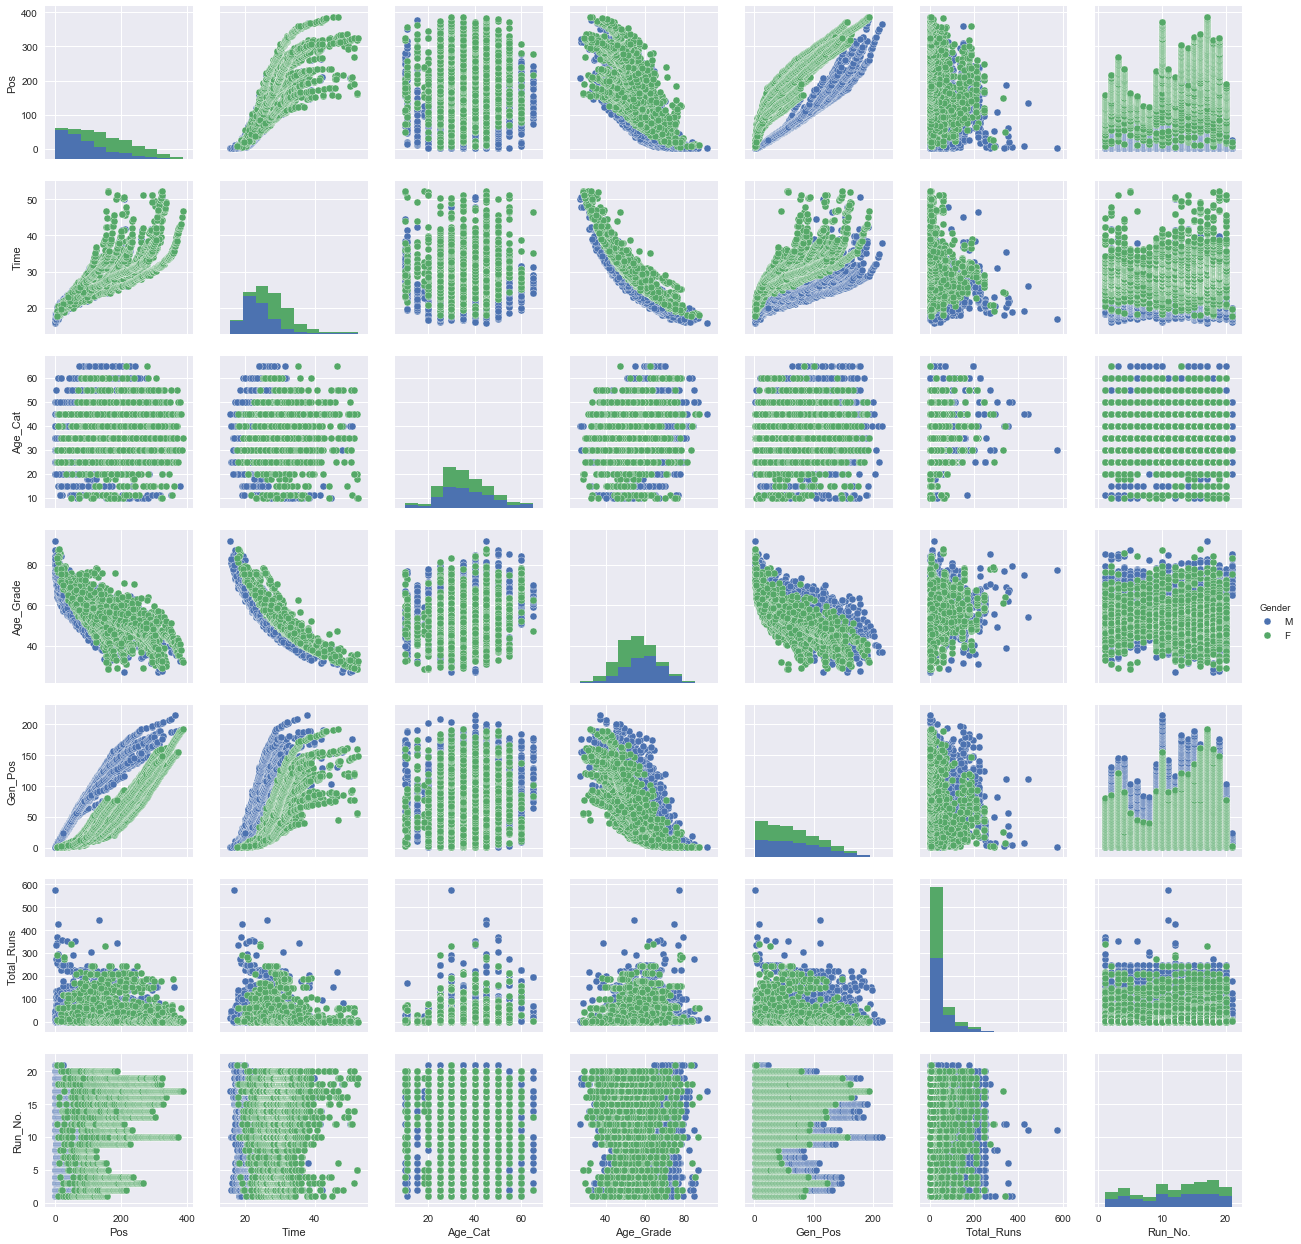

In [54]:
df = data[:5000]
df = df.drop('Club',1)
df = df.dropna()
sns.pairplot(df, hue="Gender")

## Before we start we need to change the categories from M and F to numerals
### In this case M = 0 and F = 1

In [55]:
def coding(col, codeDict):
  colCoded = pd.Series(col, copy=True)
  for key, value in codeDict.items():
    colCoded.replace(key, value, inplace=True)
  return colCoded

In [56]:
df["Gender_Coded"] = coding(df["Gender"], {'M':0,'F':1})

In [ ]:
def converter(Gender):
    if Gender=='M':
        return 0
    else:
        return 1

In [ ]:
data['Gender_Coded'] = data['Gender'].apply(converter)

In [57]:
df = df.drop('Gender',1)
df = df.drop('Note',1)
df = df.drop('Name',1)
df = df.drop('Date',1)
df = df.drop('Gen_Pos',1)
df = df.drop('Age_Grade',1)

In [58]:
df.head(10)

,Pos,Time,Age_Cat,Total_Runs,Run_No.,Gender_Coded
0,1,18.316667,35.0,29.0,1,0
1,2,18.433333,30.0,99.0,1,0
2,3,18.533333,55.0,274.0,1,0
3,4,18.650000,40.0,107.0,1,0
4,5,18.900000,50.0,369.0,1,0
5,6,20.250000,40.0,342.0,1,0
6,7,20.283333,20.0,40.0,1,0
7,8,20.450000,40.0,9.0,1,1
8,9,20.533333,45.0,296.0,1,0
9,10,20.816667,30.0,87.0,1,0


## We'll demonstrate several methods
### First up is the Support Vector Machine. 

In [59]:
y = df['Gender_Coded']
y.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    1
8    0
9    0
Name: Gender_Coded, dtype: int64

In [70]:
from sklearn.cross_validation import train_test_split

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [252]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [253]:
from sklearn.svm import SVC

In [254]:
model = SVC()

In [255]:
model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [256]:
predictions = model.predict(X_test)

In [94]:
from sklearn.metrics import classification_report,confusion_matrix

In [258]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[691  28]
 [579  75]]


             precision    recall  f1-score   support

          0       0.54      0.96      0.69       719
          1       0.73      0.11      0.20       654

avg / total       0.63      0.56      0.46      1373



In [259]:
from sklearn.grid_search import GridSearchCV

In [267]:
param_grid = {'C':[10000,1000],'gamma':[0.0001,0.00001]}

In [268]:
grid = GridSearchCV(SVC(),param_grid,verbose=3)

In [269]:
grid.fit(X_train,y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] C=10000, gamma=0.0001 ...........................................
[CV] .................. C=10000, gamma=0.0001, score=0.786517 -  15.6s
[CV] C=10000, gamma=0.0001 ...........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   15.6s remaining:    0.0s


[CV] .................. C=10000, gamma=0.0001, score=0.791003 -  14.0s
[CV] C=10000, gamma=0.0001 ...........................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   29.8s remaining:    0.0s


[CV] .................. C=10000, gamma=0.0001, score=0.794559 -  23.4s
[CV] C=10000, gamma=1e-05 ............................................
[CV] ................... C=10000, gamma=1e-05, score=0.774345 -   3.6s
[CV] C=10000, gamma=1e-05 ............................................
[CV] ................... C=10000, gamma=1e-05, score=0.783505 -   1.9s
[CV] C=10000, gamma=1e-05 ............................................
[CV] ................... C=10000, gamma=1e-05, score=0.800188 -   2.3s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................... C=1000, gamma=0.0001, score=0.784644 -   2.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................... C=1000, gamma=0.0001, score=0.792877 -   2.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................... C=1000, gamma=0.0001, score=0.797373 -   2.8s
[CV] C=1000, gamma=1e-05 .............................................
[CV] .

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:  1.2min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [10000, 1000], 'gamma': [0.0001, 1e-05]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=3)

In [270]:
grid.best_estimator_

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [271]:
grid.best_params_

{'C': 1000, 'gamma': 0.0001}

In [272]:
grid_predictions = grid.predict(X_test)

In [273]:
print(confusion_matrix(y_test,grid_predictions))
print('\n')
print(classification_report(y_test,grid_predictions))

[[568 151]
 [170 484]]


             precision    recall  f1-score   support

          0       0.77      0.79      0.78       719
          1       0.76      0.74      0.75       654

avg / total       0.77      0.77      0.77      1373



## Next we'll try Logistic Regression

In [91]:
from sklearn.linear_model import LogisticRegression

In [276]:
logmodel = LogisticRegression()

In [277]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [279]:
log_predictions = logmodel.predict(X_test)

In [280]:
print(confusion_matrix(y_test,log_predictions))
print('\n')
print(classification_report(y_test,log_predictions))

[[577 142]
 [210 444]]


             precision    recall  f1-score   support

          0       0.73      0.80      0.77       719
          1       0.76      0.68      0.72       654

avg / total       0.74      0.74      0.74      1373



## K Nearest Neighbours

In [306]:
df.head()

,Pos,Time,Age_Cat,Total_Runs,Run_No.,Gender_Coded
0,1,18.316667,35.0,29.0,1,0
1,2,18.433333,30.0,99.0,1,0
2,3,18.533333,55.0,274.0,1,0
3,4,18.650000,40.0,107.0,1,0
4,5,18.900000,50.0,369.0,1,0


In [61]:
from sklearn.preprocessing import StandardScaler

In [62]:
scaler = StandardScaler()  # have to scale it for KNN because the values affect the distance

In [63]:
scaler.fit(df.drop('Gender_Coded',1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [64]:
scaled_features = scaler.transform(df.drop('Gender_Coded',1))

In [65]:
scaled_features

array([[-1.48540488, -1.46447266, -0.11166968, -0.1809059 , -1.86493321],
       [-1.47423493, -1.44417897, -0.61302141,  1.10686061, -1.86493321],
       [-1.46306499, -1.42678438,  1.8937372 ,  4.32627687, -1.86493321],
       ..., 
       [-1.23966609, -1.20355378, -0.61302141, -0.65921917,  1.66548832],
       [-1.22849614, -1.19195739,  0.38968204, -0.03373258,  1.66548832],
       [-1.2173262 , -1.18036099, -0.61302141,  2.57859376,  1.66548832]])

In [66]:
df_feat = pd.DataFrame(scaled_features, columns=df.columns[:-1])

In [67]:
df_feat.head()

,Pos,Time,Age_Cat,Total_Runs,Run_No.
0,-1.485405,-1.464473,-0.111670,-0.180906,-1.864933
1,-1.474235,-1.444179,-0.613021,1.106861,-1.864933
2,-1.463065,-1.426784,1.893737,4.326277,-1.864933
3,-1.451895,-1.406491,0.389682,1.254034,-1.864933
4,-1.440725,-1.363004,1.392385,6.073960,-1.864933


In [68]:
y.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    1
8    0
9    0
Name: Gender_Coded, dtype: int64

In [71]:
X = df_feat
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [72]:
from sklearn.neighbors import KNeighborsClassifier

In [73]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
knn_predictions = knn.predict(X_test)

In [74]:
print(confusion_matrix(y_test,knn_predictions))
print('\n')
print(classification_report(y_test,knn_predictions))

NameError: name 'confusion_matrix' is not defined

In [75]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

AttributeError: Unknown property aspect

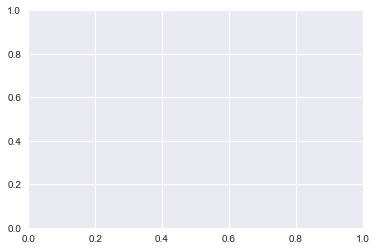

In [364]:
plt.plot(range(1,40),error_rate,color='blue', marker='o',markerfacecolor='red',size=6,aspect=2)
plt.xlabel('K')
plt.ylabel('error rate')
plt.title('Error rate vs K')
plt.show()

In [330]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,y_train)
knn_predictions = knn.predict(X_test)

In [331]:
print(confusion_matrix(y_test,knn_predictions))
print('\n')
print(classification_report(y_test,knn_predictions))

[[615 133]
 [172 453]]


             precision    recall  f1-score   support

          0       0.78      0.82      0.80       748
          1       0.77      0.72      0.75       625

avg / total       0.78      0.78      0.78      1373



## Decision Trees and Random Forests

In [334]:
df.head()

,Pos,Time,Age_Cat,Total_Runs,Run_No.,Gender_Coded
0,1,18.316667,35.0,29.0,1,0
1,2,18.433333,30.0,99.0,1,0
2,3,18.533333,55.0,274.0,1,0
3,4,18.650000,40.0,107.0,1,0
4,5,18.900000,50.0,369.0,1,0


In [336]:
X = df.drop('Gender_Coded',1)

In [338]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [339]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [340]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [341]:
dtree_preds = dtree.predict(X_test)

In [342]:
print(confusion_matrix(y_test,dtree_preds))
print('\n')
print(classification_report(y_test,dtree_preds))

[[566 182]
 [165 460]]


             precision    recall  f1-score   support

          0       0.77      0.76      0.77       748
          1       0.72      0.74      0.73       625

avg / total       0.75      0.75      0.75      1373



In [343]:
from sklearn.ensemble import RandomForestClassifier

In [344]:
rfc = RandomForestClassifier(n_estimators=200)

In [345]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [346]:
rfc_preds = rfc.predict(X_test)

In [347]:
print(confusion_matrix(y_test,rfc_preds))
print('\n')
print(classification_report(y_test,rfc_preds))

[[588 160]
 [116 509]]


             precision    recall  f1-score   support

          0       0.84      0.79      0.81       748
          1       0.76      0.81      0.79       625

avg / total       0.80      0.80      0.80      1373



#### The more data the more forest do better than a single tree

## K Means Clustering
### This is an unsupervised technique. We have labels so we can check<br> the performance of the method.

In [356]:
df.head()

,Pos,Time,Age_Cat,Total_Runs,Run_No.,Gender_Coded
0,1,18.316667,35.0,29.0,1,0
1,2,18.433333,30.0,99.0,1,0
2,3,18.533333,55.0,274.0,1,0
3,4,18.650000,40.0,107.0,1,0
4,5,18.900000,50.0,369.0,1,0


In [350]:
from sklearn.cluster import KMeans

In [352]:
kmeans = KMeans(n_clusters=2)

In [365]:
kmeans.fit(df.drop('Gender_Coded',1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [366]:
kmeans.cluster_centers_

array([[  74.2159172 ,   23.56467999,   36.2426838 ,   46.70842256,
          10.68486795],
       [ 228.48871332,   31.75015989,   35.90970655,   26.38148984,
          12.95654628]])

In [ ]:
## so there seems to be two kinda distinct clusters

In [367]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [369]:
print(confusion_matrix(df['Gender_Coded'],kmeans.labels_))
print('\n')
print(classification_report(df['Gender_Coded'],kmeans.labels_))

[[2037  457]
 [ 765 1315]]


             precision    recall  f1-score   support

          0       0.73      0.82      0.77      2494
          1       0.74      0.63      0.68      2080

avg / total       0.73      0.73      0.73      4574



In [76]:
pca_scaler = StandardScaler()

In [77]:
pca_scaler.fit(df.drop('Gender_Coded',1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [78]:
scaled_data = scaler.transform(df.drop('Gender_Coded',1))

In [79]:
from sklearn.decomposition import PCA

In [80]:
pca = PCA(n_components=2)

In [81]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [82]:
x_pca = pca.transform(scaled_data)

In [83]:
scaled_data.shape

(4574L, 5L)

In [84]:
x_pca.shape

(4574L, 2L)

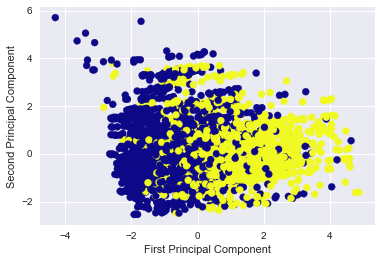

In [85]:
plt.scatter(x_pca[:,0],x_pca[:,1],c=df['Gender_Coded'],cmap='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

In [86]:
df_comp = pd.DataFrame(pca.components_,columns=df.drop('Gender_Coded',1).columns.values)

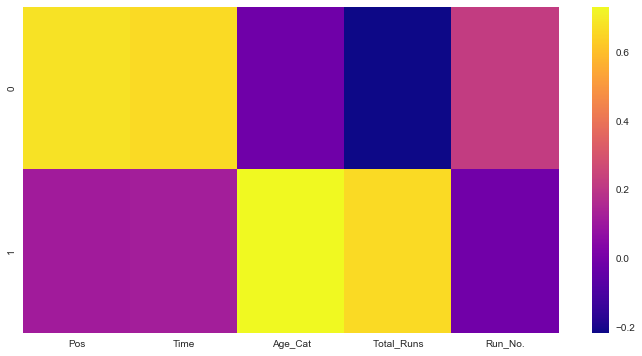

In [87]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

#### Seems to say that Pos, Time, Age and Total Runs are the important variables.
#### Could do SVM, LogReg etc. on the PCA'd data

In [88]:
y.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    1
8    0
9    0
Name: Gender_Coded, dtype: int64

In [89]:
X_train, X_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.3, random_state=42)

In [92]:
pcalogmodel = LogisticRegression()
pcalogmodel.fit(X_train,y_train)
pcalog_predictions = pcalogmodel.predict(X_test)

In [95]:
print(confusion_matrix(y_test,pcalog_predictions))
print('\n')
print(classification_report(y_test,pcalog_predictions))

[[583 165]
 [200 425]]


             precision    recall  f1-score   support

          0       0.74      0.78      0.76       748
          1       0.72      0.68      0.70       625

avg / total       0.73      0.73      0.73      1373



In [ ]:
# Can we predict if the runner is a club member?

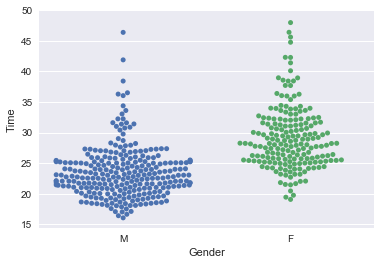

In [117]:
sns.swarmplot(x="Gender", y="Time", data=df)

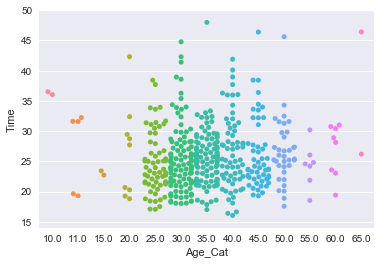

In [118]:
sns.swarmplot(x="Age_Cat", y="Time", data=df)

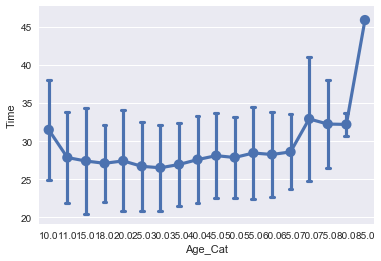

In [119]:
sns.pointplot(x="Age_Cat", y="Time", data=data, capsize=.2,ci='sd')

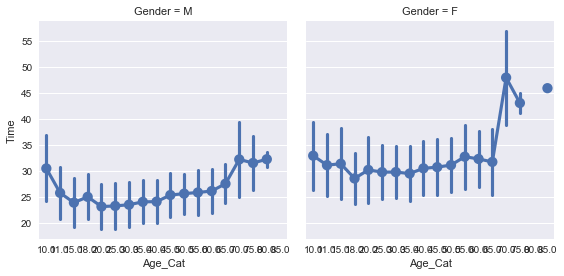

In [120]:
sns.factorplot("Age_Cat", "Time", col="Gender",
               data=data, kind="point", ci='sd')

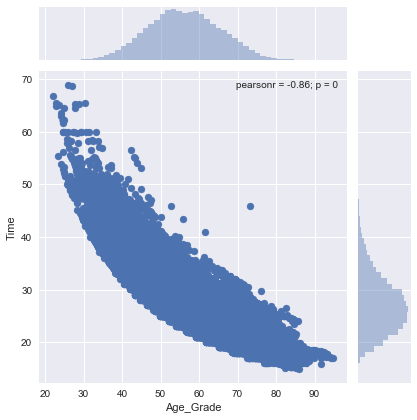

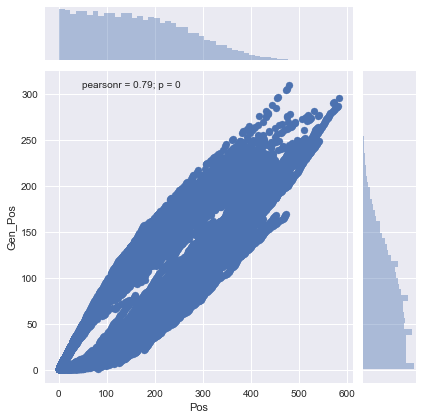

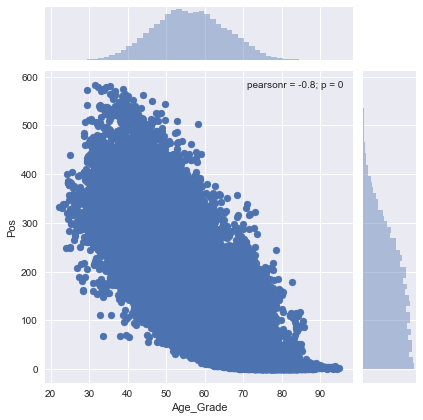

In [121]:
sns.jointplot("Age_Grade", "Time", data=data)
sns.jointplot("Pos", "Gen_Pos", data=data)
sns.jointplot("Age_Grade", "Pos", data=data)

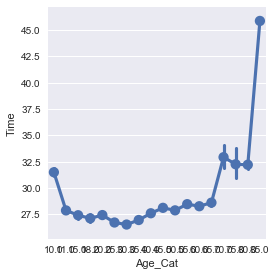

In [122]:
sns.factorplot("Age_Cat", "Time", data=data)

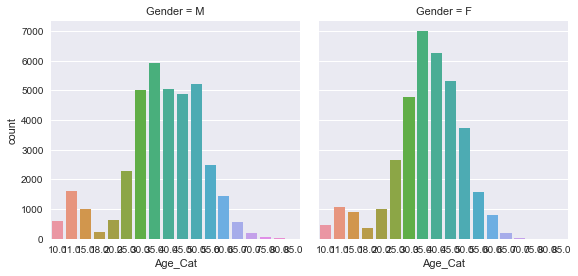

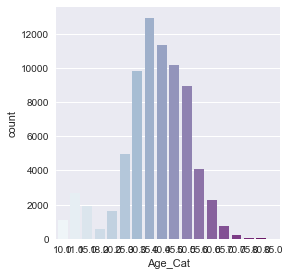

In [123]:
sns.factorplot("Age_Cat", data=data,kind='count', col="Gender")
sns.factorplot("Age_Cat", data=data,kind='count',palette='BuPu')

In [124]:
#sns.distplot(data['Age_Cat'].dropna())

In [174]:
df2 = data.dropna()
df2['Rounded_Time'] = df2['Time'].apply(lambda x: x//2)
df2['Rounded_Time'] = df2['Rounded_Time'].apply(lambda x: int(x*2))
df2['Rounded Pos'] = df2['Pos'].apply(lambda x: x//10)
df2['Rounded Pos'] = df2['Rounded Pos'].apply(lambda x: int(x*10))

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [175]:
df2.head(10)

,Date,Pos,Name,Time,Age_Cat,Age_Grade,Gender,Gen_Pos,Club,Note,Total_Runs,Run_No.,Club_Coded,Rounded_Time,Rounded Pos
0,2012-11-10,1,Michael MCSWIGGAN,18.316667,35.0,73.43,M,1.0,Portmarnock Athletic Club,First Timer!,29.0,1,1,18,0
1,2012-11-10,2,Alan FOLEY,18.433333,30.0,71.16,M,2.0,Raheny Shamrock AC,First Timer!,99.0,1,1,18,0
2,2012-11-10,3,Matt SHIELDS,18.533333,55.0,85.07,M,3.0,North Belfast Harriers,First Timer!,274.0,1,1,18,0
3,2012-11-10,4,David GARGAN,18.650000,40.0,73.73,M,4.0,Raheny Shamrock AC,First Timer!,107.0,1,1,18,0
4,2012-11-10,5,Paul SINTON-HEWITT,18.900000,50.0,79.28,M,5.0,Ranelagh Harriers,First Timer!,369.0,1,1,18,0
5,2012-11-10,6,John Gerard MURPHY,20.250000,40.0,68.97,M,6.0,North Belfast Harriers,First Timer!,342.0,1,1,20,0
6,2012-11-10,7,Conor FITZPATRICK,20.283333,20.0,64.26,M,7.0,Portmarnock Athletic Club,First Timer!,40.0,1,1,20,0
7,2012-11-10,8,Rachael BECK,20.450000,40.0,76.37,F,1.0,Fingal Triathlon Club,First Timer!,9.0,1,1,20,0
10,2012-11-10,11,Sean MCGOLDRICK,20.983333,50.0,71.41,M,10.0,Raheny Shamrock AC,First Timer!,106.0,1,1,20,10
11,2012-11-10,12,David O HARA,21.033333,45.0,67.43,M,11.0,Raheny Shamrock AC,First Timer!,61.0,1,1,20,10


In [126]:
sns.set_context("poster")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

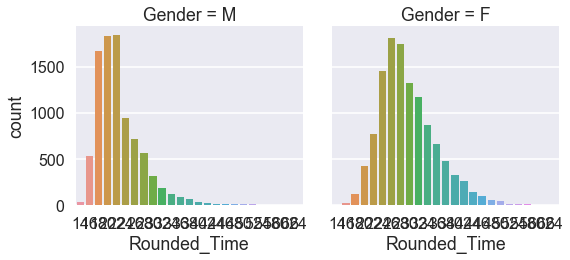

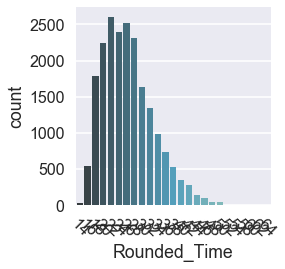

In [127]:
sns.factorplot("Rounded_Time", data=df2,kind='count', col="Gender")
sns.factorplot("Rounded_Time", data=df2,kind='count',palette='GnBu_d')
plt.xticks(rotation=-45)

In [128]:
# Could do t test on this to show there the means are likely distinct, show the p value

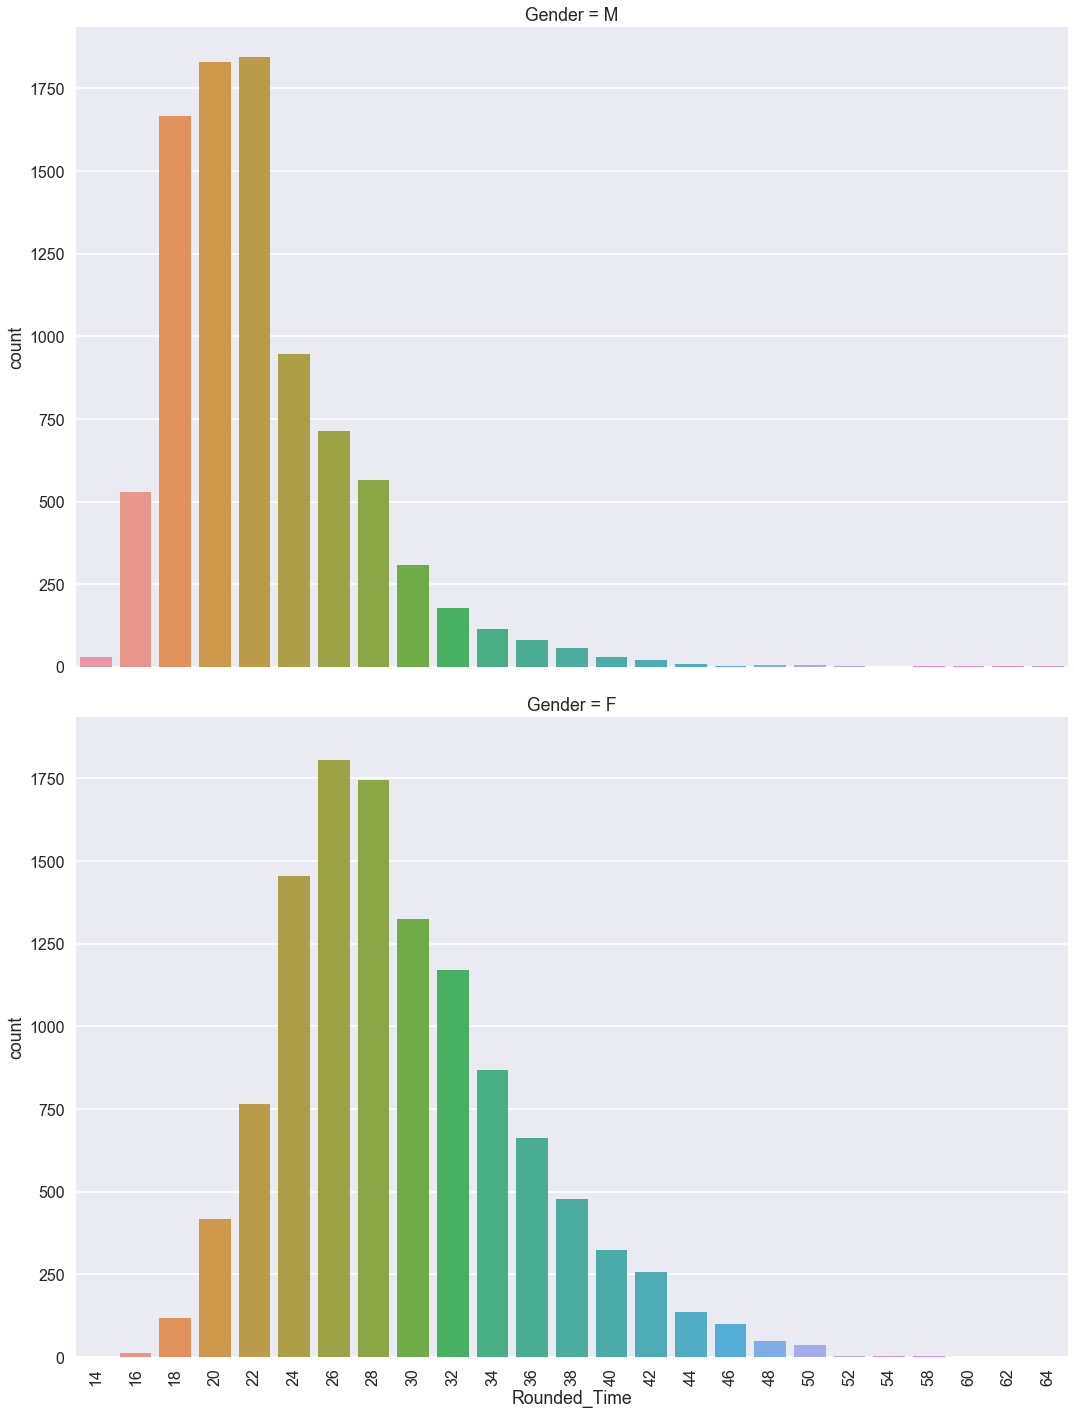

In [129]:
ax = sns.factorplot("Rounded_Time", data=df2,kind='count', row="Gender",size=10, aspect=1.5)
ax.set_xticklabels(rotation=90)
#ax2 = sns.factorplot("Rounded_Time", data=df2,kind='count',palette='GnBu_d')

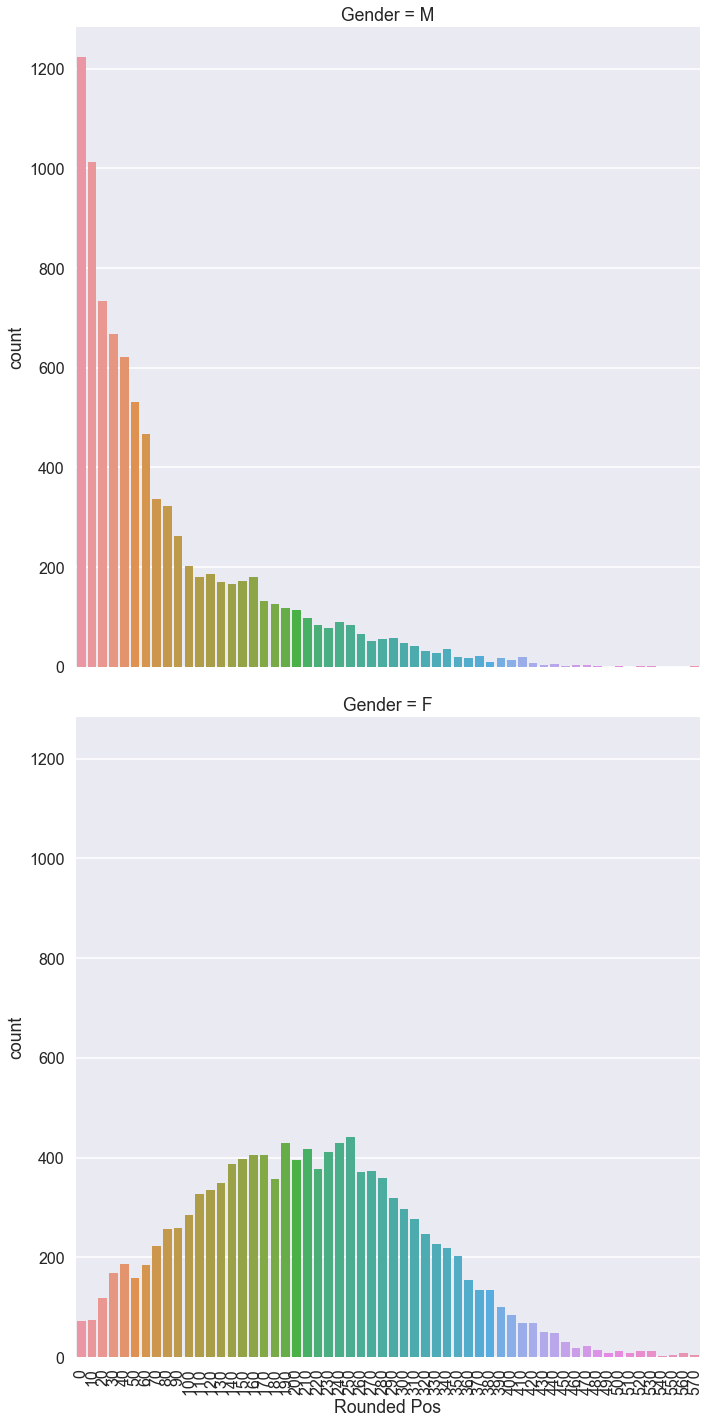

In [130]:
ax = sns.factorplot("Rounded Pos", data=df2,kind='count', row="Gender",size=10)
ax.set_xticklabels(rotation=90)

In [131]:
## it would be interesting to see relative position, from 0 to 1

In [132]:
x = data.groupby('Date').count()['Pos']
ymax = data.groupby('Date').max()['Time']
ymean = data.groupby('Date').mean()['Time']
ymin = data.groupby('Date').min()['Time']

In [274]:
X = x.iloc[:].values
y = ymean.iloc[:].values

In [275]:
X = X.reshape(1,-1)
X

array([[159, 216, 268, 236, 162, 155, 125, 124, 227, 377, 233, 209, 304,
        295, 326, 336, 387, 321, 325, 190, 409, 410, 394, 427, 513, 508,
        362, 442, 436, 420, 414, 368, 321, 304, 397, 367, 332, 415, 389,
        440, 383, 336, 297, 308, 284, 271, 261, 297, 260, 271, 287, 274,
        484, 298, 271, 294, 208, 189, 176, 158, 293, 382, 321, 338, 272,
        321, 211, 275, 313, 433, 450, 401, 386, 542, 429, 582, 380, 450,
        323, 451, 342, 371, 414, 370, 323, 285, 314, 349, 349, 329, 159,
        368, 356, 316, 353, 407, 361, 298, 378, 407, 387, 323, 413, 423,
        322, 316, 343, 340, 296, 285, 326, 232, 242, 378, 444, 358, 370,
        420, 360, 393, 459, 403, 465, 541, 459, 452, 390, 479, 288, 215,
        265, 424, 399, 360, 405, 299, 382, 273, 300, 332, 347, 335, 339,
        392, 364, 290, 338, 323, 277, 297, 333, 341, 253, 262, 271, 263,
        249, 178, 224, 222, 112,  69, 206, 127, 218, 243, 479, 452, 339,
        321, 347, 342, 338, 321, 383, 352, 251, 335

In [276]:
y = y.reshape(1,-1)
y

array([[ 27.83077778,  26.32227723,  26.75296443,  25.93258258,
         25.78657718,  24.95780886,  25.21386431,  25.25732759,
         26.41003086,  26.29791045,  26.1109831 ,  28.22625   ,
         26.60833333,  26.73370508,  27.0183114 ,  27.75206298,
         26.4739011 ,  27.54163861,  28.1204023 ,  27.97261905,
         27.60430403,  27.54131016,  27.5762037 ,  27.88508065,
         28.38682678,  27.91252723,  28.15717949,  27.75164557,
         26.97751323,  26.67334195,  27.03175248,  26.96511628,
         26.95651135,  26.372057  ,  27.21790675,  27.22606707,
         26.95673181,  27.2529386 ,  27.28657143,  27.4394247 ,
         27.52528033,  27.10897868,  26.29850746,  26.35191358,
         27.07484036,  28.12765648,  27.29334828,  27.95121795,
         26.45436681,  26.21911765,  26.54064208,  27.40613333,
         27.54870919,  26.75667939,  26.62835325,  27.52426564,
         25.68378623,  26.30398773,  25.69188312,  27.48019324,
         27.01993711,  27.46220871,  27.

In [277]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

In [278]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [279]:
y_pred = regressor.predict(X_test)

In [280]:
X_train

array([], shape=(0L, 275L), dtype=int64)

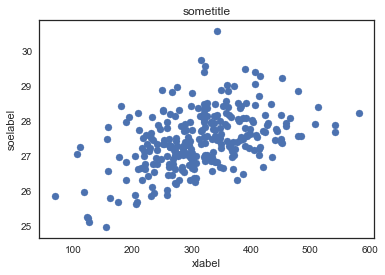

In [281]:
plt.scatter(X, y)#, color='red')
#plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('sometitle')
plt.xlabel('count')
plt.ylabel('soelabel')
plt.show()

In [172]:
plt.scatter(x,ymin)
plt.scatter(x,ymean)
plt.scatter(x,ymax)
plt.title('sometitle')
plt.xlabel('xlabel')
plt.ylabel('soelabel')
plt.show()

NameError: name 'x' is not defined

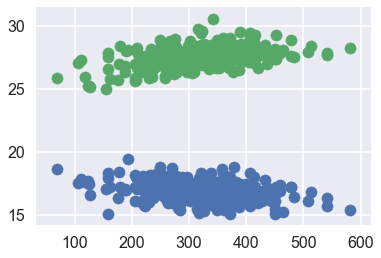

In [134]:
plt.scatter(x,ymin)
plt.scatter(x,ymean)
plt.show()
#do regression on this
# do hue for gender
# is this just because more slow people show up
#or is it due to people getting in each others way
# could check by looking at individuals times and seeing how they change with no.of runners

In [135]:
df3 = pd.DataFrame({'x':x,'ymax':ymax,'ymean':ymean,'ymin':ymin})

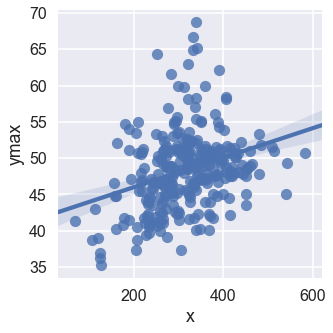

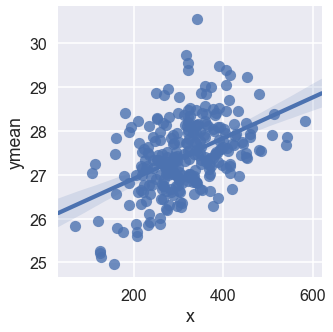

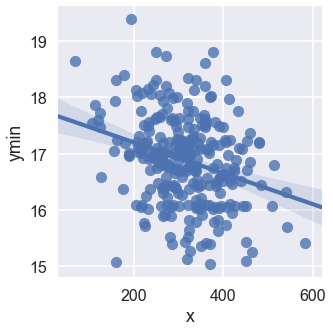

In [136]:
sns.lmplot('x','ymax',df3)
sns.lmplot('x','ymean',df3)
sns.lmplot('x','ymin',df3)

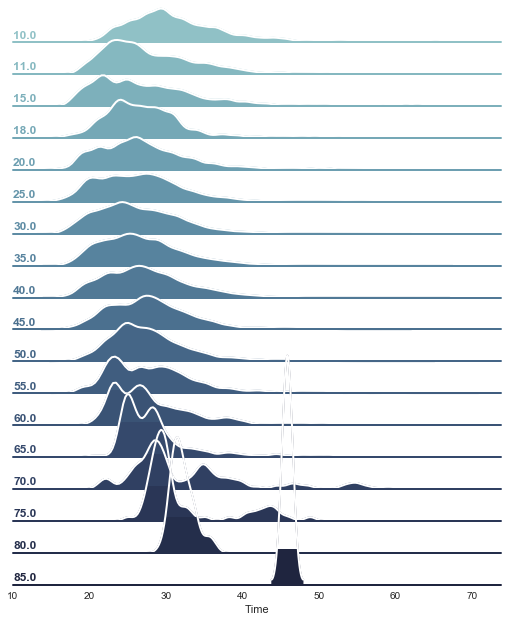

In [137]:
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Create the data
#rs = np.random.RandomState(1979)
#x = rs.randn(500)
#Age_Cat = np.tile(list("ABCDEFGHIJ"), 50)
#df = pd.DataFrame(dict(x=x, g=g))
#m = data.Age_Cat.map
#data["Time"] += m

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(18, rot=-.25, light=.7)
g = sns.FacetGrid(data, row="Age_Cat", hue="Age_Cat", aspect=15, size=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "Time", clip_on=False, shade=True, alpha=1, lw=1.5, bw=.7)
g.map(sns.kdeplot, "Time", clip_on=False, color="w", lw=2, bw=.7)
g.map(plt.axhline, y=0, lw=2, clip_on=False)

# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color, 
            ha="left", va="center", transform=ax.transAxes)

g.map(label, "Time")

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.1)

# Remove axes details that don't play will with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

In [143]:
cat1 = data[data['Gender']=='M']
cat2 = data[data['Gender']=='F']
stats.ttest_ind(cat1['Time'], cat2['Time'])

Ttest_indResult(statistic=-152.04054750419755, pvalue=0.0)

In [58]:
#data.set_index(['Gender','Age_Cat'],inplace=True)

In [59]:
#data.sort_index(inplace=True)

In [60]:
#data.loc[('F',35.0)]